In [2]:
import numpy as np
import torch
import scanpy as sc
from data import PertDataloader, Network


model_name = 'GNN_Disentangle_GAT_string_20.0_64_2_l3_Norman2019_gamma2_gene_emb_pert_emb_constant_lambda_emission'
args = np.load('./saved_args/'+model_name+'.npy', allow_pickle = True).item()
args['device'] = 'cuda:3'

In [3]:
args['test_perts'] = 'N/A'
args['uncertainty'] = False
args['no_pert_emb'] = False
args['batchnorm'] = False
args['skipsum'] = False
args['no_disentangle'] = False

In [4]:
if args['network_name'] == 'string':
    args['network_path'] = '/dfs/project/perturb-gnn/graphs/STRING_full_9606.csv'

if args['dataset'] == 'Norman2019':
    data_path = '/dfs/project/perturb-gnn/datasets/Norman2019/Norman2019_hvg+perts_more_de.h5ad'

adata = sc.read_h5ad(data_path)
if 'gene_symbols' not in adata.var.columns.values:
    adata.var['gene_symbols'] = adata.var['gene_name']
gene_list = [f for f in adata.var.gene_symbols.values]
# Set up message passing network
network = Network(fname=args['network_path'], gene_list=args['gene_list'],
                  percentile=args['top_edge_percent'])

# Pertrubation dataloader
pertdl = PertDataloader(adata, network.G, network.weights, args)

There are 101013 edges in the PPI.
Creating pyg object for each cell in the data...
Local copy of pyg dataset is detected. Loading...
Loading splits...
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:52
combo_seen2:18
unseen_single:37
Creating dataloaders....
Dataloaders created...


In [6]:
model = torch.load('./saved_models/' + model_name)
#model.pert_emb_agg = 'constant'
#model.lambda_emission = False
model.sim_gnn = False
model.args = args
model.uncertainty = False
model.delta_predict_with_gene = False
from torch.nn import ReLU
model.act = ReLU()
from inference import evaluate, compute_metrics, deeper_analysis, GI_subgroup

test_res = evaluate(pertdl.loaders['test_loader'],
                        pertdl.loaders['edge_index'],
                        pertdl.loaders['edge_attr'], model, args)

test_metrics, test_pert_res = compute_metrics(test_res)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/dfs/user/kexinh/miniconda3/

In [7]:
out = deeper_analysis(adata, test_res)

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user/kexinh/perturb_GNN/kexin/inference.py:264: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert_mean/ctrl
/dfs/user

In [8]:
# calculate mean expression for each condition
unique_conditions = adata.obs.condition.unique()
conditions2index = {}
for i in unique_conditions:
    conditions2index[i] = np.where(adata.obs.condition == i)[0]
    
condition2mean_expression = {}
for i, j in conditions2index.items():
    condition2mean_expression[i] = np.mean(adata.X[j], axis = 0)
    
pert_list = np.array(list(condition2mean_expression.keys()))
mean_expression = np.array(list(condition2mean_expression.values())).reshape(len(adata.obs.condition.unique()), adata.X.toarray().shape[1])

ctrl = mean_expression[np.where(pert_list == 'ctrl')[0]]
most_variable_genes = np.argsort(np.std(mean_expression, axis = 0))[-200:]
gene_list = adata.var['gene_name'].values

In [9]:
fold_change_all = []
for c in pert_list:
    i = np.where(pert_list == c)[0]
    pert = mean_expression[i]

    fold_change = pert/ctrl
    fold_change[np.isnan(fold_change)] = 0
    fold_change[np.isinf(fold_change)] = 0

    #fold_change[0][np.where(pert[0] < 0.5)[0]] = 0
    fold_change_all.append(fold_change[0])
    
fold_change_all = np.stack(fold_change_all)


/tmp/ipykernel_18130/1466758563.py:6: RuntimeWarning: divide by zero encountered in true_divide
  fold_change = pert/ctrl
/tmp/ipykernel_18130/1466758563.py:6: RuntimeWarning: invalid value encountered in true_divide
  fold_change = pert/ctrl


In [10]:
combo_seen0 = pertdl.subgroup['test_subgroup']['combo_seen0']
combo_seen1= pertdl.subgroup['test_subgroup']['combo_seen1']
unseen_single = pertdl.subgroup['test_subgroup']['unseen_single']
train_perts = pertdl.set2conditions['train']

In [11]:
combo_seen0

['POU3F2+FOXL2',
 'ZBTB10+PTPN12',
 'CEBPB+PTPN12',
 'CBL+PTPN12',
 'RHOXF2BB+SET',
 'CDKN1C+CDKN1B',
 'CDKN1C+CDKN1A',
 'CDKN1B+CDKN1A',
 'C3orf72+FOXL2']

In [12]:
train_pert = train_perts[0]
pert2high_folds_up = {}
pert2low_folds_down = {}

for train_pert in train_perts:
    temp = np.where(pert_list == train_pert)[0]
    o = np.intersect1d(np.where(fold_change_all[temp][0] <0.333)[0], np.where(fold_change_all[temp][0] > 0)[0])
    if len(o) > 0:
        pert2low_folds_down[train_pert] = gene_list[o].tolist()
        
    o = np.where(fold_change_all[np.where(pert_list == train_pert)[0]][0] >3)[0]
    if len(o) > 0:
        pert2high_folds_up[train_pert] = gene_list[o].tolist()

In [13]:
all_high_folds = []
for i in pert2high_folds_up.values():
    all_high_folds = all_high_folds + i
    
all_high_folds_down = []
for i in pert2low_folds_down.values():
    all_high_folds_down = all_high_folds_down + i

In [14]:
all_high_folds_stats = {}

for i in pert2high_folds_up.values():
    for j in i:
        if j in all_high_folds_stats:
            all_high_folds_stats[j] += 1
        else:
            all_high_folds_stats[j] = 1


all_high_folds_down_stats = {}

for i in pert2low_folds_down.values():
    for j in i:
        if j in all_high_folds_down_stats:
            all_high_folds_down_stats[j] += 1
        else:
            all_high_folds_down_stats[j] = 1

In [15]:
all_high_folds = np.unique(all_high_folds)
all_high_folds_down = np.unique(all_high_folds_down)

In [16]:
len(all_high_folds_down)

912

In [17]:
from utils import parse_single_pert, parse_any_pert
unseen_single_gene = [parse_single_pert(i) for i in unseen_single]
genesymbol2pert = dict(zip(unseen_single_gene, unseen_single))

In [18]:
print('# of upreg perts: ' + str(len(np.unique(np.intersect1d(unseen_single_gene, all_high_folds)))))
print('# of downreg perts: ' + str(len(np.unique(np.intersect1d(unseen_single_gene, all_high_folds_down)))))
print('# of total num of perts: ' + str(len(np.unique(unseen_single_gene))))

# of upreg perts: 5
# of downreg perts: 7
# of total num of perts: 27


In [19]:
up_overlap = np.intersect1d(unseen_single_gene, all_high_folds)
down_overlap = np.intersect1d(unseen_single_gene, all_high_folds_down)
non_overlap = np.setdiff1d(unseen_single_gene, up_overlap.tolist() + down_overlap.tolist())

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

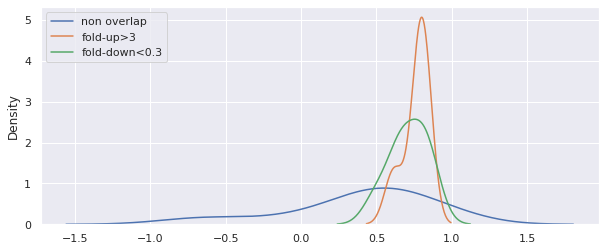

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 4)})

metric = 'pearson_delta_top20_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top20_de')

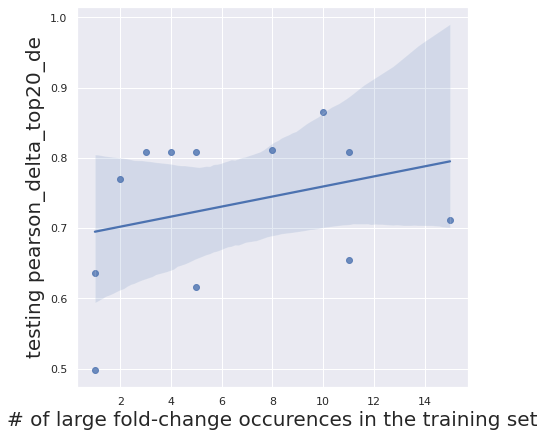

In [21]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

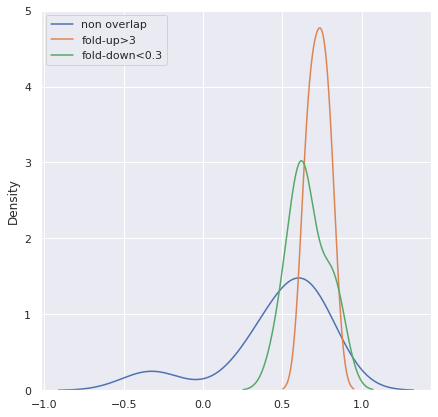

In [22]:
metric = 'pearson_delta_top50_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top50_de')

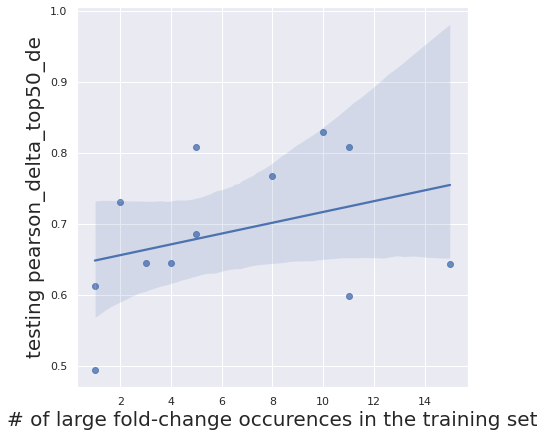

In [23]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

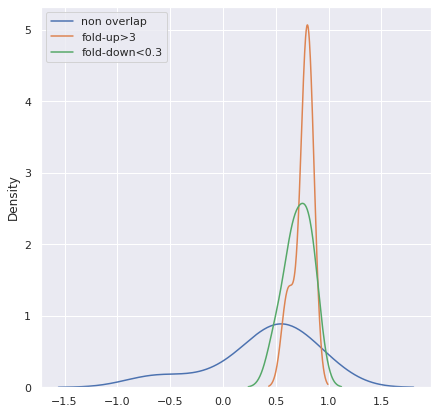

In [24]:
metric = 'pearson_delta_de'

ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_de')

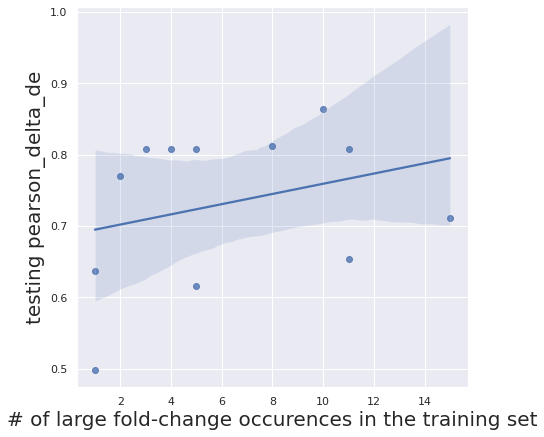

In [25]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert[i]][metric] for i in up_overlap] + [out[genesymbol2pert[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

In [26]:
unique_train_perts_list = [parse_any_pert(i) for i in train_perts if i != 'ctrl']
unique_train_perts = []
for i in unique_train_perts_list: 
    unique_train_perts += i
unique_train_perts = np.unique(unique_train_perts)

In [27]:
from utils import parse_single_pert, parse_any_pert
unseen_combo1_gene = [parse_any_pert(i) for i in combo_seen1]
unseen_combo1_gene = [np.setdiff1d(i, unique_train_perts)[0] for i in unseen_combo1_gene]
genesymbol2pert_combo1 = dict(zip(unseen_combo1_gene, combo_seen1))

In [28]:
print('# of upreg perts: ' + str(len(np.unique(np.intersect1d(unseen_combo1_gene, all_high_folds)))))
print('# of downreg perts: ' + str(len(np.unique(np.intersect1d(unseen_combo1_gene, all_high_folds_down)))))
print('# of total num of perts: ' + str(len(np.unique(unseen_combo1_gene))))

# of upreg perts: 2
# of downreg perts: 6
# of total num of perts: 18


In [29]:
up_overlap = np.intersect1d(unseen_combo1_gene, all_high_folds)
down_overlap = np.intersect1d(unseen_combo1_gene, all_high_folds_down)
non_overlap = np.setdiff1d(unseen_combo1_gene, up_overlap.tolist() + down_overlap.tolist())

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

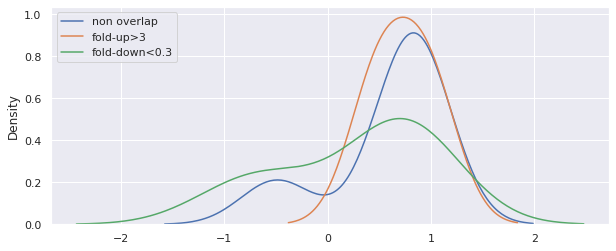

In [30]:
sns.set(rc={'figure.figsize':(10, 4)})

metric = 'pearson_delta_top20_de'

ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

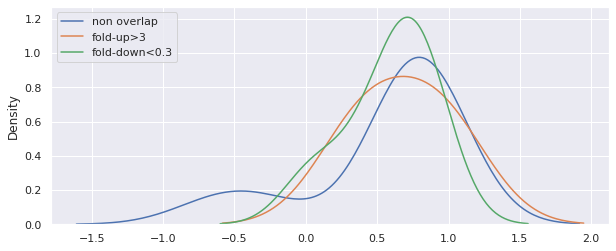

In [31]:
metric = 'pearson_delta_top50_de'

ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

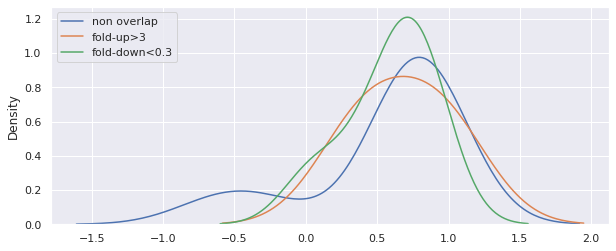

In [32]:
metric = 'pearson_delta_top50_de'
sns.set(rc={'figure.figsize':(10, 4)})

ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in non_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in up_overlap], hist = False, label = 'partners')
ax = sns.distplot([out[genesymbol2pert_combo1[i]][metric] for i in down_overlap], hist = False, label = 'partners')
plt.legend(loc='upper left', labels=['non overlap', 'fold-up>3', 'fold-down<0.3'])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top50_de')

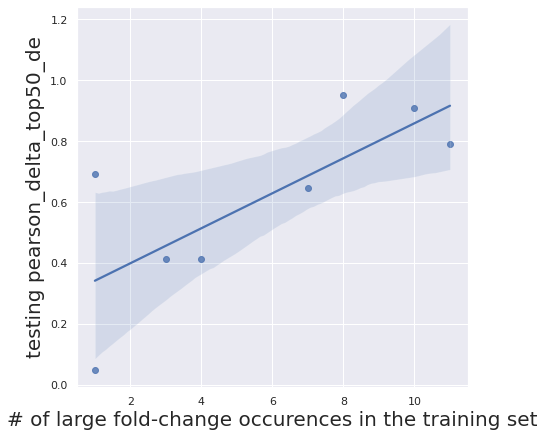

In [33]:
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([all_high_folds_stats[i] for i in up_overlap] + [all_high_folds_down_stats[i] for i in down_overlap], 
                [out[genesymbol2pert_combo1[i]][metric] for i in up_overlap] + [out[genesymbol2pert_combo1[i]][metric] for i in down_overlap])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

In [34]:
test_pert_res

{'AHR+KLF1': {'mse': 0.047497246,
  'mae': 0.20169196,
  'spearman': 0.8566636876095525,
  'pearson': 0.9662782422985531,
  'r2': 0.6411066419540834,
  'mse_de': 0.20963807,
  'mae_de': 0.32611084,
  'spearman_de': 0.7969924812030074,
  'pearson_de': 0.9218417167713014,
  'r2_de': 0.6221596685071646},
 'ARID1A+ctrl': {'mse': 0.016690683,
  'mae': 0.10817968,
  'spearman': 0.8137690983538582,
  'pearson': 0.9779060974706244,
  'r2': 0.8821768585934249,
  'mse_de': 0.22552183,
  'mae_de': 0.41018933,
  'spearman_de': 0.9151289674603723,
  'pearson_de': 0.933347941053014,
  'r2_de': 0.793297286308746},
 'BCL2L11+BAK1': {'mse': 0.011466894,
  'mae': 0.08761609,
  'spearman': 0.810480958800498,
  'pearson': 0.9845411140373576,
  'r2': 0.920485144697443,
  'mse_de': 0.028895458,
  'mae_de': 0.16323061,
  'spearman_de': 0.37796447300922725,
  'pearson_de': 0.9863749316518677,
  'r2_de': -1.2928430390635315},
 'BCL2L11+TGFBR2': {'mse': 0.014109374,
  'mae': 0.10073636,
  'spearman': 0.84351370

In [35]:
pert2stat = {}
for i in test_pert_res.keys():
    sep_perts = parse_any_pert(i) 
    sum_stats = []
    for j in sep_perts:
        if j in all_high_folds_stats:
            sum_stats.append(all_high_folds_stats[j])
        elif j in all_high_folds_down_stats:
            sum_stats.append(all_high_folds_down_stats[j])
        else:
            sum_stats.append(0)
    sum_stats = sum(sum_stats)/len(sum_stats)   
    pert2stat[i] = sum_stats

In [36]:
all_high_folds_stats

{'TTLL10-AS1': 35,
 'CALML6': 17,
 'TTC34': 24,
 'RP1-286D6.5': 44,
 'HES2': 18,
 'ESPN': 29,
 'CNR2': 21,
 'RP11-184I16.4': 22,
 'RP4-794H19.1': 35,
 'CLCA1': 34,
 'HFE2': 53,
 'CELF3': 21,
 'KCNN3': 26,
 'SLAMF6': 22,
 'ITLN2': 50,
 'CFHR3': 44,
 'RP11-78B10.2': 5,
 'PROX1': 39,
 'SLC35F3': 27,
 'LINC01376': 45,
 'AC020594.5': 21,
 'CDC42EP3': 18,
 'CYP1B1-AS1': 16,
 'RP11-333I13.1': 39,
 'AC007131.1': 40,
 'ATP6V1B1': 10,
 'M1AP': 32,
 'REEP1': 38,
 'KIAA1211L': 24,
 'RGPD8': 38,
 'CCDC74B': 18,
 'ERMN': 38,
 'RP11-1152H14.1': 32,
 'FSIP2': 51,
 'HECW2': 24,
 'RP11-107N15.1': 54,
 'AC079354.3': 28,
 'NYAP2': 25,
 'AC098823.3': 19,
 'RAMP1': 30,
 'RP11-266J6.2': 19,
 'RP11-24F11.2': 51,
 'ALS2CL': 24,
 'SEMA3F': 40,
 'RP11-894J14.5': 23,
 'SPATA12': 10,
 'RP11-245J9.4': 15,
 'ROBO1': 9,
 'RP11-90K6.1': 15,
 'RP11-553L6.5': 24,
 'RP11-174O3.6': 23,
 'MYLK': 40,
 'BFSP2-AS1': 61,
 'RP11-102M11.2': 15,
 'RP11-167H9.4': 9,
 'RP11-367J11.3': 22,
 'SH3TC1': 36,
 'AC195454.1': 18,
 'LINC016

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top50_de')

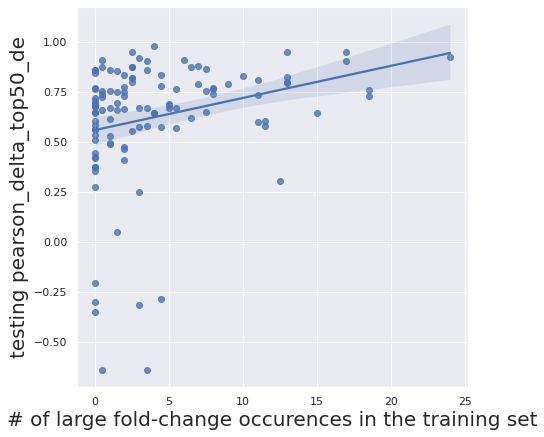

In [37]:
metric = 'pearson_delta_top50_de'
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([pert2stat[i] for i in test_pert_res.keys()],
                [out[i][metric] for i in test_pert_res.keys()])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'testing pearson_delta_top50_de')

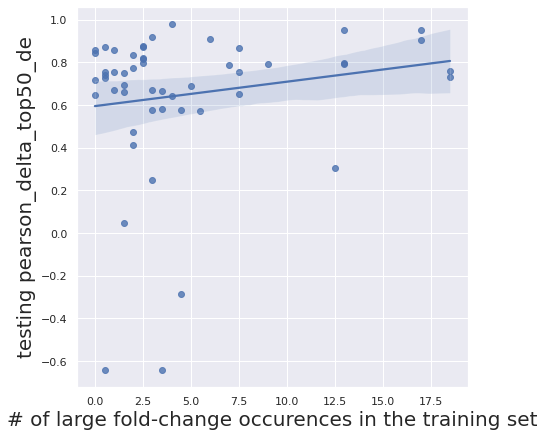

In [38]:
metric = 'pearson_delta_top50_de'
sns.set(rc={'figure.figsize':(7, 7)})

ax = sns.regplot([pert2stat[i] for i in pertdl.subgroup['test_subgroup']['combo_seen1'] if metric in out[i]],
                [out[i][metric] for i in pertdl.subgroup['test_subgroup']['combo_seen1'] if metric in out[i]])
ax.set_xlabel('# of large fold-change occurences in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)

In [39]:
train_pert_all_inx = np.where(np.isin(pert_list, train_perts))[0]

In [40]:
np.mean(fold_change_all[train_pert_all_inx, np.where(gene_list == sep_perts[0])[0]])

1.119722

In [41]:
np.where(gene_list == sep_perts[0])[0]

array([2682])

In [42]:
pert2stat = {}
for i in test_pert_res.keys():
    sep_perts = parse_any_pert(i) 
    sum_stats = []
    for j in sep_perts:
        if (i in pertdl.subgroup['test_subgroup']['combo_seen1']) and (j in unique_train_perts):
            pass
        else:
            sum_stats.append(np.quantile(fold_change_all[train_pert_all_inx, np.where(gene_list == j)[0]], 0.75))
    sum_stats = min(sum_stats)   
    pert2stat[i] = sum_stats

In [51]:
from scipy.stats import pearsonr, spearmanr

In [52]:
metric = 'pearson_delta'
stats_summary = [pert2stat[i] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
print(spearmanr(stats_summary, metric_summary))
print(pearsonr(stats_summary, metric_summary))

SpearmanrResult(correlation=0.2146734385423405, pvalue=0.02066153802360424)
(0.20906124911141805, 0.024308218523850685)


In [54]:
pert2status = {}

for i in ['combo_seen1', 'combo_seen2', 'combo_seen0', 'unseen_single']:
    for k in pertdl.subgroup['test_subgroup'][i]:
        pert2status[k] = i

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

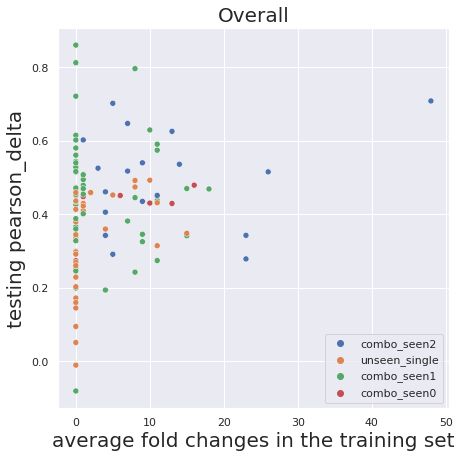

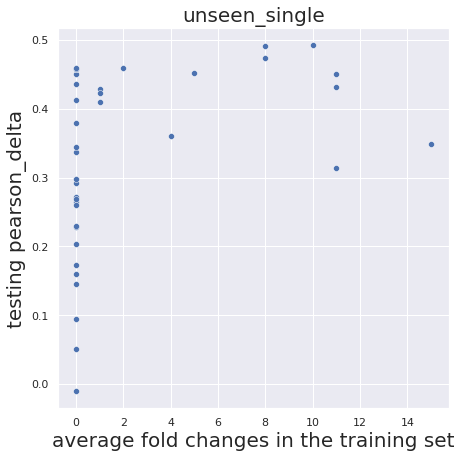

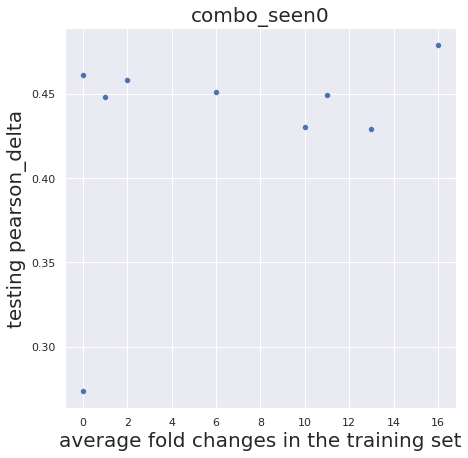

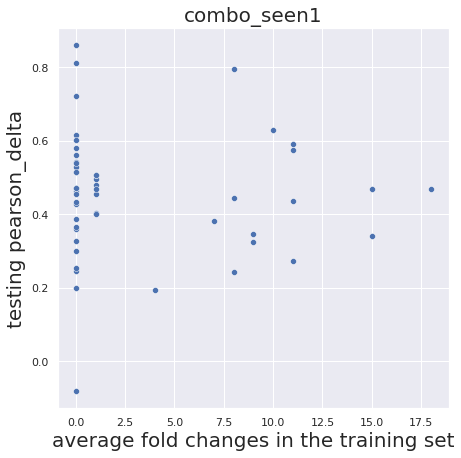

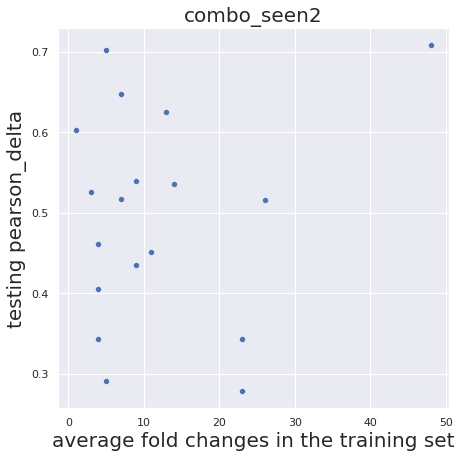

In [59]:
metric = 'pearson_delta'
sns.set(rc={'figure.figsize':(7, 7)})

plt.figure()
stats_summary = [pert2stat[i] for i in test_pert_res.keys() if metric in out[i]]
metric_summary = [out[i][metric] for i in test_pert_res.keys() if metric in out[i]]
#reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]

ax = sns.scatterplot(np.array(stats_summary),
                np.array(metric_summary), hue = [pert2status[i] for i in test_pert_res.keys()])
ax.set_xlabel('average fold changes in the training set', fontsize = 20)
ax.set_ylabel('testing ' + metric, fontsize = 20)
ax.set_title('Overall', fontsize = 20)

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [pert2stat[i] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.scatterplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('average fold changes in the training set', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x, fontsize = 20)
    

In [44]:
pert2stat = {}
for i in test_pert_res.keys():
    sep_perts = parse_any_pert(i) 
    sum_stats = []
    for j in sep_perts:
        if (i in pertdl.subgroup['test_subgroup']['combo_seen1']) and (j in unique_train_perts):
            pass
        else:
            if j in all_high_folds_stats:
                sum_stats.append(all_high_folds_stats[j])
            elif j in all_high_folds_down_stats:
                sum_stats.append(all_high_folds_down_stats[j])
            else:
                sum_stats.append(0)
    sum_stats = sum(sum_stats)   
    pert2stat[i] = sum_stats

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

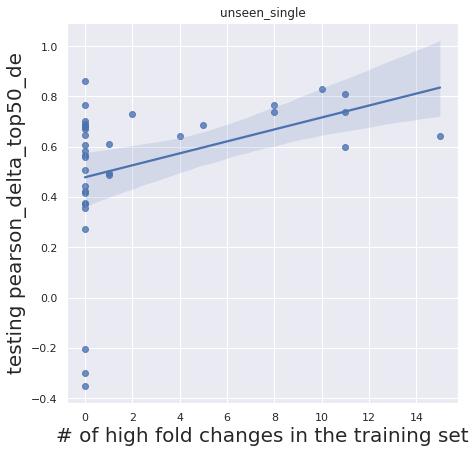

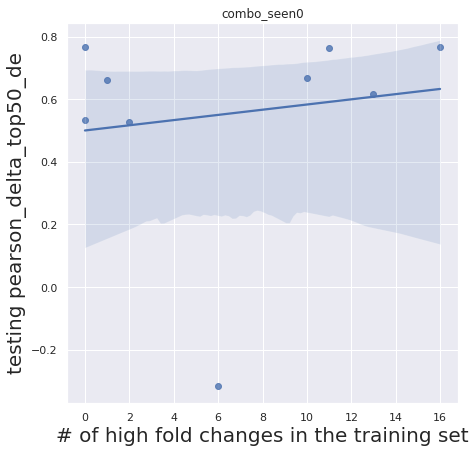

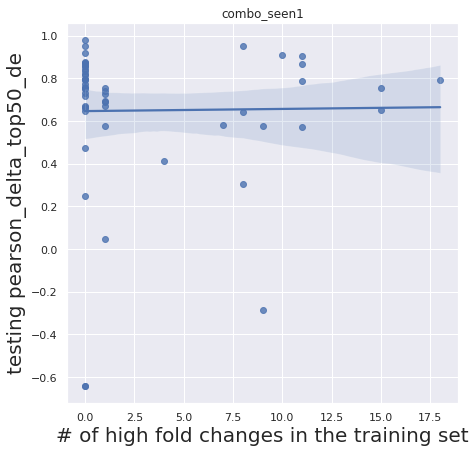

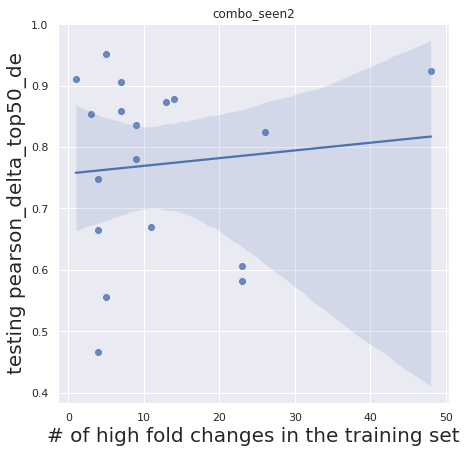

In [45]:
metric = 'pearson_delta_top50_de'
sns.set(rc={'figure.figsize':(7, 7)})

for x in ['unseen_single', 'combo_seen0', 'combo_seen1', 'combo_seen2']:
    plt.figure()
    stats_summary = [pert2stat[i] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    metric_summary = [out[i][metric] for i in pertdl.subgroup['test_subgroup'][x] if metric in out[i]]
    #reduce_outlier = np.where(stats_summary < np.quantile(stats_summary, 0.85))[0]
    
    ax = sns.regplot(np.array(stats_summary),
                    np.array(metric_summary))
    ax.set_xlabel('# of high fold changes in the training set', fontsize = 20)
    ax.set_ylabel('testing ' + metric, fontsize = 20)
    ax.set_title(x)
    

In [46]:
ctrl

array([[0.0000000e+00, 3.0636375e-03, 7.3340833e-03, ..., 3.7373223e+00,
        8.7353901e-04, 0.0000000e+00]], dtype=float32)

In [47]:
delta = adata.X.toarray() - ctrl[0]

In [48]:
X = adata.X.toarray()

In [45]:
delta_mean = np.mean(delta, axis = 0)
X_mean = np.mean(X, axis = 0)

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

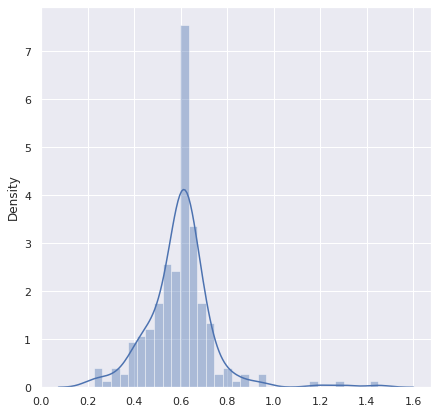

In [46]:
sns.distplot(np.std(delta, axis = 0)[most_variable_genes])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

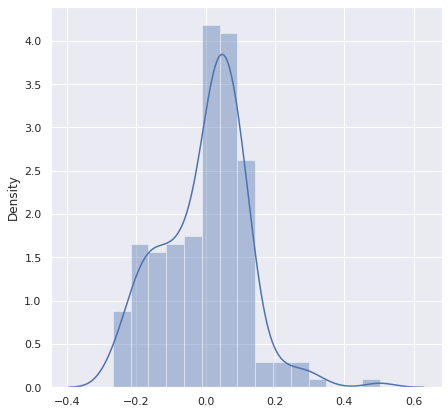

In [47]:
sns.distplot(delta_mean[most_variable_genes])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

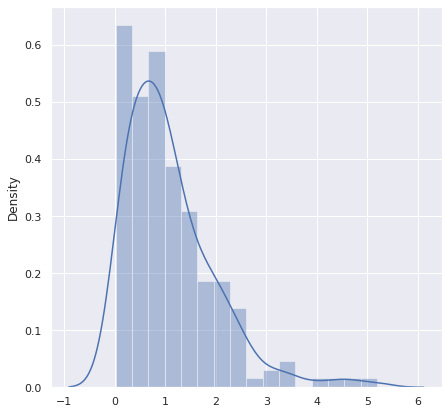

In [48]:
sns.distplot(X_mean[most_variable_genes])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

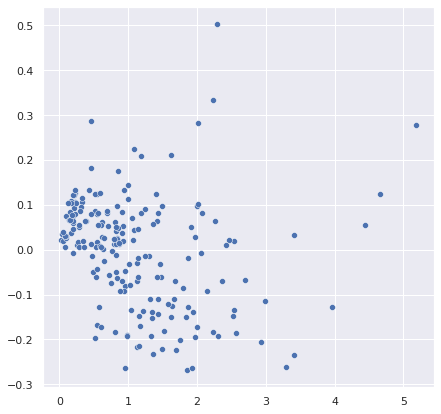

In [49]:
sns.scatterplot(X_mean[most_variable_genes], delta_mean[most_variable_genes])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

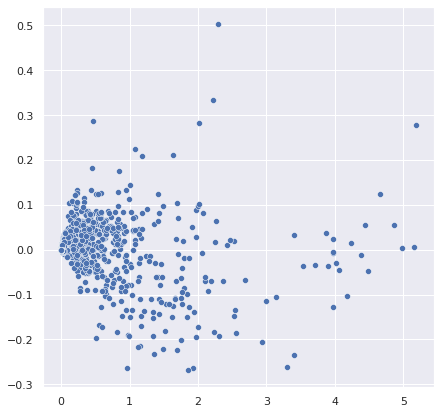

In [50]:
sns.scatterplot(X_mean, delta_mean)

In [51]:
all_high_folds_down_stats

{'RASGRP3': 8,
 'RP11-355B11.2': 6,
 'NPHP1': 15,
 'CYBB': 4,
 'AKNA': 4,
 'RP11-162G10.5': 10,
 'ALOX5': 14,
 'MIR202HG': 9,
 'PHLDA1': 13,
 'FOXA1': 10,
 'ATP1B2': 10,
 'TIMP2': 2,
 'SMOX': 2,
 'SMIM24': 2,
 'EBI3': 1,
 'MCEMP1': 13,
 'CLC': 10,
 'FUT1': 14,
 'GPR157': 14,
 'RP4-798A10.7': 1,
 'IFI6': 4,
 'RP11-422P24.12': 16,
 'FCGR2A': 12,
 'C1orf132': 4,
 'PLXNA2': 13,
 'CNNM4': 3,
 'RGPD5': 15,
 'CCDC173': 6,
 'DNAJB2': 1,
 'PLD1': 1,
 'TMEM156': 6,
 'KIT': 19,
 'STAP1': 15,
 'CCNG2': 3,
 'ALPK1': 7,
 'ERAP2': 6,
 'SMIM3': 4,
 'CCNJL': 12,
 'LCP2': 20,
 'SDC2': 15,
 'TRIB1': 11,
 'TSPAN32': 1,
 'YPEL4': 6,
 'SESN3': 9,
 'BIRC3': 7,
 'ZBTB16': 26,
 'RP11-598F7.3': 7,
 'ARHGDIB': 5,
 'NTS': 18,
 'VASH1': 5,
 'EPB42': 6,
 'GNB5': 10,
 'IGDCC3': 21,
 'TM6SF1': 10,
 'ARRDC4': 3,
 'ABAT': 8,
 'RP11-403P17.4': 2,
 'CD300A': 11,
 'LGALS3BP': 3,
 'MYH7B': 15,
 'TLE2': 6,
 'TNFSF9': 4,
 'ZSWIM4': 8,
 'FOSB': 8,
 'APOL6': 6,
 'APOL4': 4,
 'RP1-43E13.2': 3,
 'MIXL1': 2,
 'LYG2': 11,
 'FBLN2'

In [82]:
test_res['pred'][:, most_variable_genes]

array([[0.35702163, 1.090389  , 0.21644074, ..., 1.0877681 , 2.1127846 ,
        2.3356075 ],
       [0.48417968, 1.1194471 , 0.28587463, ..., 1.798312  , 3.0823717 ,
        3.2933123 ],
       [0.44757074, 1.1373543 , 0.26513076, ..., 1.4526292 , 2.7528439 ,
        2.9058359 ],
       ...,
       [0.53315896, 1.1057591 , 0.19306767, ..., 1.7151728 , 2.7878482 ,
        2.904624  ],
       [0.4221229 , 1.0104172 , 0.21347046, ..., 1.3219093 , 2.3233578 ,
        2.4215472 ],
       [0.450091  , 1.0829582 , 0.31330675, ..., 1.1113737 , 2.1985803 ,
        2.3050385 ]], dtype=float32)

In [78]:
test_res['pert_cat']

array(['IRF1+SET', 'AHR+KLF1', 'DUSP9+KLF1', ..., 'FEV+ISL2',
       'BCL2L11+TGFBR2', 'NCL+ctrl'], dtype='<U15')

In [62]:
mean_expression_pred = {}
for pert in np.unique(test_res['pert_cat']):
    p_idx = np.where(test_res['pert_cat'] == pert)[0]
    mean_expression_pred[pert] = np.mean(test_res['pred'][p_idx], axis = 0)

In [63]:
mean_expression_pred['AHR+KLF1'].shape

(5045,)

In [64]:
delta_test_pred = (np.array([mean_expression_pred[i] for i in mean_expression_pred.keys()]) - ctrl)[:, most_variable_genes]

In [65]:
delta_test_true = (np.array([mean_expression[np.where(pert_list == i)[0]][0] for i in mean_expression_pred.keys()])- ctrl)[:, most_variable_genes]

In [66]:
from scipy.stats import pearsonr, spearmanr

In [67]:
gene_level_pearson = []
for i in range(delta_test_pred.shape[1]):

    pred_gene = delta_test_pred[:, i]
    true_gene = delta_test_true[:, i]
    
    gene_level_pearson.append(pearsonr(pred_gene, true_gene)[0])

/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

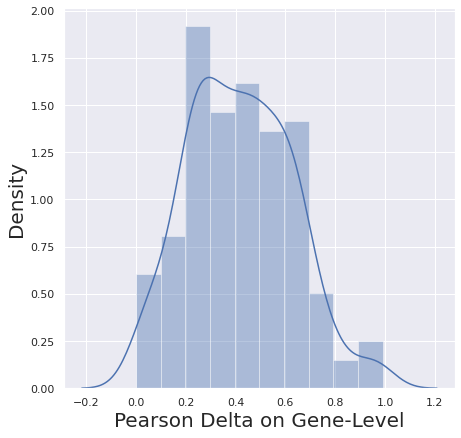

In [69]:
ax = sns.distplot(gene_level_pearson)
ax.set_xlabel('Pearson Delta on Gene-Level', fontsize = 20)
ax.set_ylabel('Density', fontsize = 20)

In [107]:
delta_test_pred

array([[ 0.31039792, -0.04085648,  0.282795  , ...,  0.9083704 ,
         1.1455787 ,  1.4825865 ],
       [ 0.23359694, -0.09252107,  0.31056812, ...,  0.31457484,
         0.26610935,  0.5130073 ],
       [ 0.13263236, -0.07261956,  0.17647901, ...,  0.23433578,
         0.21758759,  0.40155995],
       ...,
       [ 0.23201717, -0.09063482,  0.310425  , ...,  0.3253621 ,
         0.27155387,  0.5109631 ],
       [ 0.23269968, -0.09150589,  0.31061035, ...,  0.32219136,
         0.2684294 ,  0.511974  ],
       [ 0.23345454, -0.09156251,  0.31039044, ...,  0.32066977,
         0.26673162,  0.513018  ]], dtype=float32)

In [ ]:
fold_change_all

In [53]:
adata_adamson = sc.read_h5ad('/dfs/project/perturb-gnn/datasets/Adamson2016_hvg+perts.h5ad')

In [54]:
adata_adamson.X

<69249x5060 sparse matrix of type '<class 'numpy.float32'>'
	with 72480070 stored elements in Compressed Sparse Row format>

In [58]:
adata_adamson.obs.condition.value_counts()

ctrl            24263
IER3IP1+ctrl     1267
YIPF5+ctrl       1182
SCYL1+ctrl       1024
HSPA5+ctrl       1002
                ...  
HARS+ctrl         272
CAD+ctrl          242
COPZ1+ctrl        220
PPWD1+ctrl        190
COPB1+ctrl        185
Name: condition, Length: 88, dtype: int64

In [61]:
adata_adamson

AnnData object with n_obs × n_vars = 69249 × 5060
    obs: 'cov_drug_dose_name', 'dose_val', 'control', 'condition', 'guide_identity', 'drug_dose_name', 'cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_name'
    uns: 'hvg', 'rank_genes_groups_cov'
    layers: 'counts'

In [62]:
adata.var.gene_name

gene_id
ENSG00000239945    RP11-34P13.8
ENSG00000223764     RP11-54O7.3
ENSG00000187634          SAMD11
ENSG00000187642           PERM1
ENSG00000188290            HES4
                       ...     
ENSG00000198786          MT-ND5
ENSG00000198695          MT-ND6
ENSG00000198727          MT-CYB
ENSG00000273554      AC136616.1
ENSG00000278633      AC023491.2
Name: gene_name, Length: 5045, dtype: category
Categories (5045, object): ['A2M', 'A2M-AS1', 'A2ML1', 'AAK1', ..., 'ZSWIM1', 'ZSWIM4', 'ZSWIM8', 'ZYX']

In [64]:
len(np.intersect1d(adata_adamson.var.gene_name.values, adata.var.gene_name))

1731